<a href="https://colab.research.google.com/github/byteWizard07/Ha-build1/blob/main/HaBuild1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

# This will open a file upload dialog
uploaded = files.upload()

Saving Assignment_Habuild_Data analyst.xlsx to Assignment_Habuild_Data analyst.xlsx


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Get the uploaded file name (assuming there's only one file uploaded)
file_path = list(uploaded.keys())[0]

# Load the Excel file into pandas
xls = pd.ExcelFile(file_path)

# List all sheet names to check
print(xls.sheet_names)

['PCOD_Program_Sign_Up_Form_22K_D', 'longform', 'feedback_form', 'About', 'Questions']


In [4]:
# Load the main dataset
df = pd.read_excel(xls, sheet_name="PCOD_Program_Sign_Up_Form_22K_D")

In [5]:
# Display first few rows
df.head()

,Unique ID,City,Age,Profession,Weight in Kg (Optional),I am experiencing,Submission type,SEPARATOR : : Interested as I relate to PCOD,My periods are :,I have facial hair growth ?,...,Added Time,CRM Status,Referrer Name,Task Owner,UTM Campaign Details,IP Address,Modified Time,Submitters Location,Submitters Latitude,Submitters Longitude
0,4b1105692373967996991da84d794f5b,Vapi,47,Homemaker,58.0,Perimenopause/menopause,PMP Sign Up Dec24,NaN,NaN,NaN,...,2024-12-23 09:00:00,New Record - Record added ; Related List - ...,https://programs.habuild.in/,product@habuild.in,"utm_source : Whatsapp , utm_medium : Instant+M...",103.240.209.60,NaN,"Vapi, Vapi Taluka, Valsad, Gujarat, 396191, India",20.381532,72.900973
1,a13e6533fe705d39633078efc5627cad,Pune,38,Other,63.0,"None of the above, here for knowledge",PMP Sign Up Dec24,NaN,NaN,NaN,...,2024-12-23 08:21:00,New Record - Record added ; Related List - ...,https://programs.habuild.in/,product@habuild.in,"utm_source : Whatsapp , utm_medium : Instant+M...",58.84.61.185,NaN,NaN,NaN,NaN
2,65ea7a0324257680b7f6c5f87ed13848,Pune,52,Freelancer/Self Employed,66.0,Perimenopause/menopause,PMP Sign Up Dec24,NaN,NaN,NaN,...,2024-12-23 08:00:00,New Record - Record added ; Related List - ...,https://programs.habuild.in/,product@habuild.in,"utm_source : Whatsapp , utm_medium : Instant+M...",42.104.227.93,NaN,NaN,NaN,NaN
3,b38ea2d97ebf7f51d68c6e50b53c9898,Hyderabad,56,Homemaker,55.0,I can relate to both pcod/menopause,PMP Sign Up Dec24,NaN,NaN,NaN,...,2024-12-23 07:49:00,New Record - Record added ; Related List - ...,https://programs.habuild.in/,product@habuild.in,"utm_source : Whatsapp , utm_medium : Instant+M...",49.43.225.240,NaN,NaN,NaN,NaN
4,6e920332d060df5cbe844cf2dcf2d366,Bhusawal,54,Homemaker,59.0,Perimenopause/menopause,PMP Sign Up Dec24,NaN,NaN,NaN,...,2024-12-23 07:40:00,New Record - Record updated ; Related List ...,https://programs.habuild.in/,product@habuild.in,"utm_source : Whatsapp , utm_medium : Instant+M...",152.58.16.41,NaN,NaN,NaN,NaN


In [6]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21066 entries, 0 to 21065
Data columns (total 35 columns):
 #   Column                                                                           Non-Null Count  Dtype         
---  ------                                                                           --------------  -----         
 0   Unique ID                                                                        21066 non-null  object        
 1   City                                                                             21065 non-null  object        
 2   Age                                                                              21066 non-null  int64         
 3   Profession                                                                       19775 non-null  object        
 4   Weight in Kg (Optional)                                                          19771 non-null  float64       
 5   I am experiencing                                                  

None

In [7]:
# Check for missing values
print(df.isnull().sum())

Unique ID                                                                              0
City                                                                                   1
Age                                                                                    0
Profession                                                                          1291
Weight in Kg (Optional)                                                             1295
I am experiencing                                                                      0
Submission type                                                                        0
SEPARATOR : :  Interested as I relate to PCOD                                      21066
My periods are :                                                                   18435
I have facial hair growth ?                                                        18352
I get acne on my face ?                                                            19164
My mood swings a coup

In [8]:
# Drop irrelevant columns and handle missing values
df = df[['Unique ID', 'City', 'Age', 'Weight in Kg (Optional)', 'Submitters Location']]
df.dropna(inplace=True)

<ipython-input-8-f7f6460c5a51>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [9]:
# Demographic Analysis - Which city has the highest number of customers?
city_counts = df["City"].value_counts()
top_city = city_counts.idxmax()
print(f"City with the highest number of customers: {top_city} ({city_counts.max()} customers)")

City with the highest number of customers: Mumbai (771 customers)


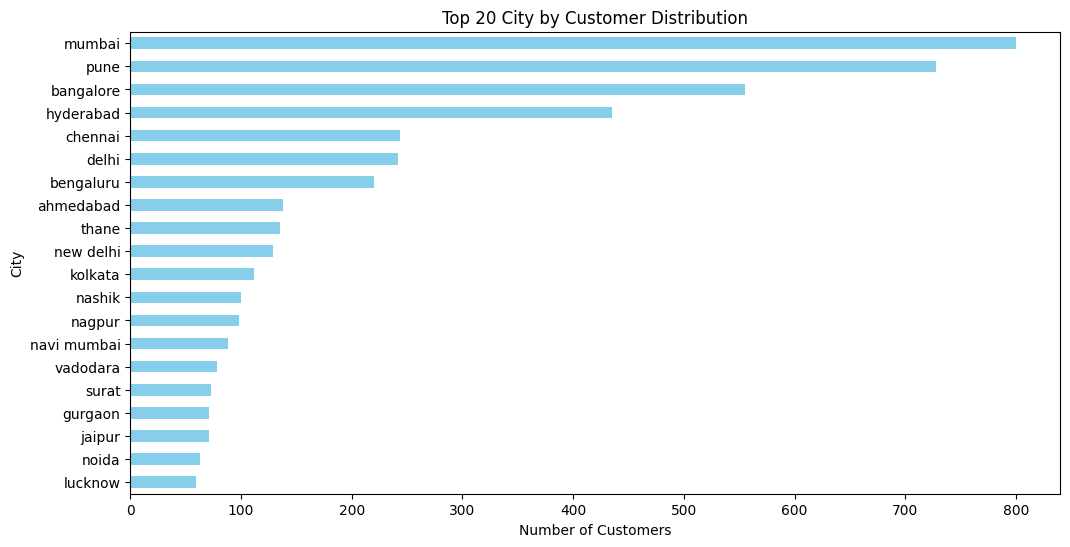

In [40]:
# Drop rows where the 'City' is numeric (integer or float)
df_cleaned = df[~df['City'].apply(lambda x: isinstance(x, (int, float)))]

# Calculate the state counts (assuming you have the 'State' column for the aggregation)
state_counts = df_cleaned['City'].value_counts()

# Select the top 20 states based on the customer count
top_20_states = state_counts.nlargest(20)

# Plot the bar chart for the top 20 City
plt.figure(figsize=(12,6))
top_20_states.sort_values(ascending=True).plot(kind="barh", color="skyblue")
plt.title("Top 20 City by Customer Distribution")
plt.xlabel("Number of Customers")
plt.ylabel("City")
plt.show()

In [11]:
# Which city has the best average weight loss?
city_avg_weight = df.groupby('City')['Weight in Kg (Optional)'].mean().sort_values(ascending=False)
best_weight_loss_city = city_avg_weight.idxmax()
print(f"City with the best average weight loss: {best_weight_loss_city} ({city_avg_weight.max():.2f} kg)")

City with the best average weight loss: Torrance ca (180.00 kg)


In [12]:
display(city_avg_weight.head(10))

,Weight in Kg (Optional)
City,
Torrance ca,180.0
Dix Hills,161.0
Waldorf,155.0
SUGARLAND,155.0
"Austin,TX",146.0
Colonia,145.0
"Philadelphia, PA",138.0
Cleveland,135.0
Bridgewater,129.0


In [13]:
# Drop rows where the 'City' is numeric (integer or float)
df_cleaned = df[~df['City'].apply(lambda x: isinstance(x, (int, float)))]

# Summary of the cities with respect to the data
city_summary = df_cleaned.groupby('City').agg({'Unique ID': 'count', 'Age': 'mean', 'Weight in Kg (Optional)': 'mean'})
city_summary.rename(columns={'Unique ID': 'Customer Count', 'Age': 'Average Age', 'Weight in Kg (Optional)': 'Average Weight'}, inplace=True)

# Sort the city summary by 'Customer Count' in descending order
city_summary_sorted = city_summary.sort_values(by='Customer Count', ascending=False)

# Display the first 100 rows of the sorted summary
display(city_summary_sorted.head(20))

,Customer Count,Average Age,Average Weight
City,,,
Mumbai,771,47.050584,69.779118
Pune,678,43.410029,67.583555
Bangalore,518,44.623552,69.854903
Hyderabad,414,42.422705,71.852536
Chennai,235,45.174468,70.616596
Delhi,231,45.878788,70.796970
Bengaluru,202,43.504950,68.246782
Ahmedabad,134,44.417910,71.089552
Thane,127,45.039370,68.584646


In [50]:
import pandas as pd
import re
from fuzzywuzzy import process

# List of Indian states
indian_states = [
    "Andhra Pradesh", "Arunachal Pradesh", "Assam", "Bihar", "Chhattisgarh",
    "Goa", "Gujarat", "Haryana", "Himachal Pradesh", "Jharkhand",
    "Karnataka", "Kerala", "Madhya Pradesh", "Maharashtra", "Manipur",
    "Meghalaya", "Mizoram", "Nagaland", "Odisha", "Punjab",
    "Rajasthan", "Sikkim", "Tamil Nadu", "Telangana", "Tripura",
    "Uttar Pradesh", "Uttarakhand", "West Bengal", "Delhi"
]

# Function to clean text
def clean_text(text):
    if pd.isna(text):
        return "Unknown"
    text = text.lower().strip()
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    return text

# Function to detect non-Indian locations
def check_international(location):
    if pd.isna(location):
        return False
    location = location.lower()
    return not any(state.lower() in location for state in indian_states)

# Function to extract state from "Submitters Location"
def extract_state(location):
    if pd.isna(location):
        return "Unknown"

    location = location.lower()

    # If it's an international location, return "International"
    if check_international(location):
        return "Not Fuzzy matched"

    # Try exact state match
    for state in indian_states:
        if state.lower() in location:
            return state

    return "Unknown"

# Function to fuzzy match cities to state
def fuzzy_match(city):
    city = clean_text(city)
    best_match = process.extractOne(city, indian_states)
    return best_match[0] if best_match and best_match[1] > 60 else "Unknown"

# Step 1: Extract state from "Submitters Location"
df["State"] = df["Submitters Location"].apply(extract_state)

# Step 2: If state is still "Unknown", use fuzzy matching on "City"
df.loc[df["State"] == "Unknown", "State"] = df.loc[df["State"] == "Unknown", "City"].apply(fuzzy_match)

# Step 3: Debugging Check - Print remaining unknown states
unknown_states = df[df["State"] == "Unknown"]
print("Rows where state is still unknown after fuzzy matching:")
print(unknown_states[["City", "Submitters Location", "State"]])

# Display processed data
df[["City", "Submitters Location", "State"]].head(20)

Rows where state is still unknown after fuzzy matching:
Empty DataFrame
Columns: [City, Submitters Location, State]
Index: []


,City,Submitters Location,State
0,vapi,"Vapi, Vapi Taluka, Valsad, Gujarat, 396191, India",Gujarat
6,mumbai,"Krungthep Thani Tower, Soi Sukhumvit 24, Khlon...",Not Fuzzy matched
8,ahmedabad,"Ravishankar Maharaj Road, Khodiyar Nagar, Karm...",Gujarat
13,mumbai,"Apsara International, Tilak Lane, Willingdon, ...",Maharashtra
15,mauritian,"Chamouny, Savanne, 60902, Mauritius",Not Fuzzy matched
23,surat,"Majura Taluka, Surat, Gujarat, 394550, India",Gujarat
31,nimapada,"Nimapada, Puri, Odisha, India",Odisha
33,nashik,"chembur high school, Ramakrishna Chemburkar Ma...",Maharashtra
34,hyderabad,"INCOIS, Ward 125 Gajularamaram, Greater Hydera...",Telangana
36,balugaon,"BALUGAON HIGH SCHOOL, Banpur Road, Ashok Nagar...",Odisha


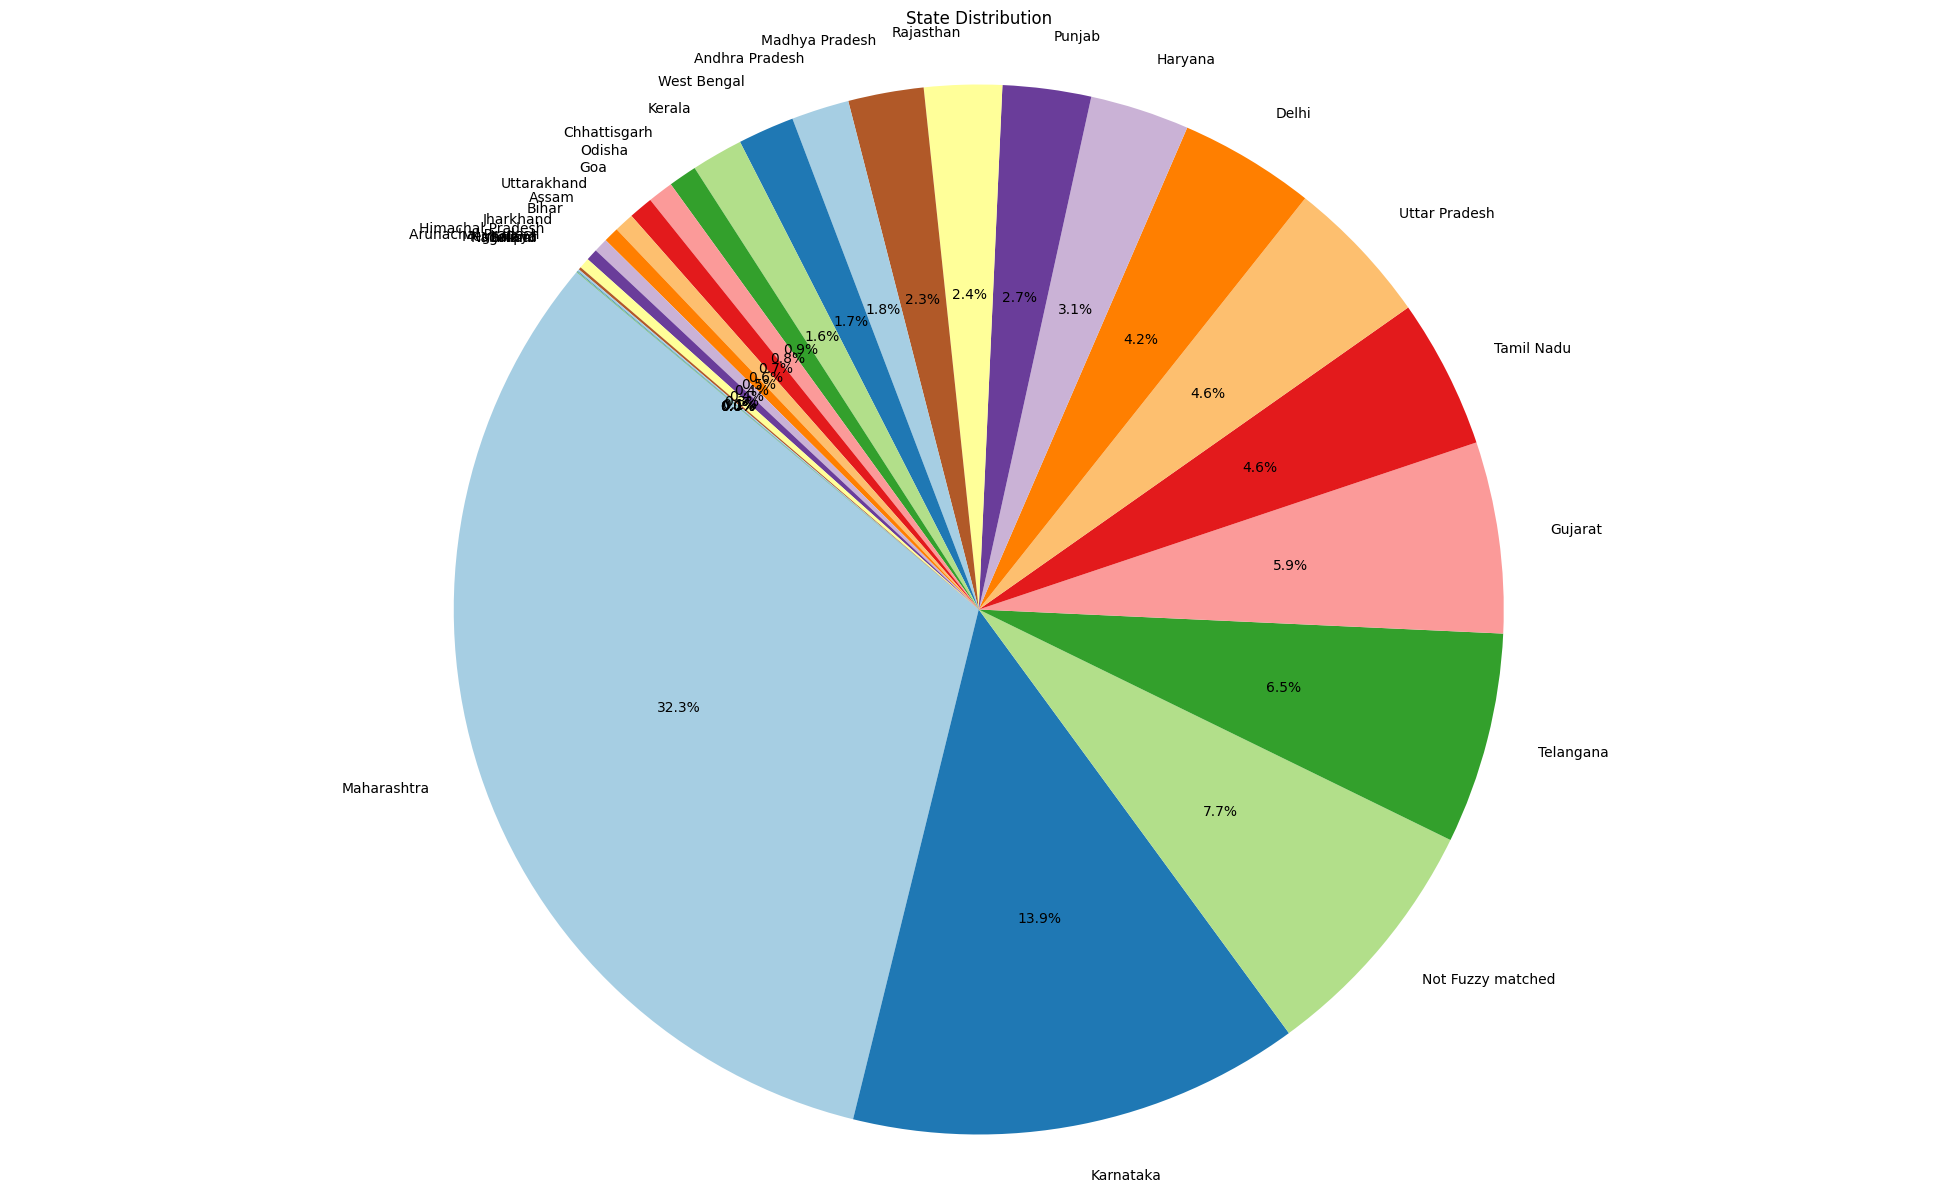

In [54]:
import matplotlib.pyplot as plt

# Count occurrences of each state in the 'State' column
state_counts = df["State"].value_counts()

# Plot a pie chart
plt.figure(figsize=(25, 15))  # Set the figure size for better visibility
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("State Distribution")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

In [55]:
# Count occurrences of each state in the 'State' column
state_counts = df["State"].value_counts()

# Calculate the percentage for each state
total_count = len(df)
state_percentages = (state_counts / total_count) * 100

# Print state-wise percentage distribution
for state, percentage in state_percentages.items():
    print(f"{state}: {percentage:.2f}%")

Maharashtra: 32.26%
Karnataka: 13.91%
Not Fuzzy matched: 7.71%
Telangana: 6.50%
Gujarat: 5.89%
Tamil Nadu: 4.60%
Uttar Pradesh: 4.57%
Delhi: 4.18%
Haryana: 3.06%
Punjab: 2.72%
Rajasthan: 2.39%
Madhya Pradesh: 2.32%
Andhra Pradesh: 1.77%
West Bengal: 1.74%
Kerala: 1.59%
Chhattisgarh: 0.88%
Odisha: 0.78%
Goa: 0.75%
Uttarakhand: 0.61%
Assam: 0.47%
Bihar: 0.43%
Jharkhand: 0.36%
Himachal Pradesh: 0.33%
Arunachal Pradesh: 0.08%
Meghalaya: 0.06%
Manipur: 0.02%
Nagaland: 0.01%
Sikkim: 0.01%


**Summary of the Exploratory Data Analysis: -**

---



1. **The City having highest Customer is:** Mumbai (771 Customers)
2. **The City having the best Weight lost is:** Torrance ca (180.00 kg)
3. **The State having highest Percentage Split is:** Maharashtra (32.26%)